### This is the script that finds the genes associated with drugs that have side effects of Hyperglycaemia or Hypoglycaemia for the Frequency Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/meddra_freq.tsv"
#path to file that is being analyzed

In [3]:
df = pd.read_csv(path_to_file,delimiter="\t", header=None)
df.rename(columns={0:'ID'}, inplace=True)
# creates a dataframe from the tsv file by converting it to a csv file and then showing the .read_csv function that the delimiter is a tab (''\t')
#renames the first column of the dataframe [index: 0] to 'ID'

In [4]:
df3 = df.loc[df[9].isin(["Hyperglycaemia", "Hypoglycaemia","Hypotension", "Hypertension"])]
df3.head()
#df3 searches the entire dataframe(df) for all cases in index=9 where one of these eight scenarios are present: blood pressure inc/dec, weight inc/dec, blood glucose inc/dec, hyper/hypo - cholesterolaemia

,ID,1,2,3,4,5,6,7,8,9
237,CID100000085,CID000010917,C0020538,NaN,18%,0.18,0.18,LLT,C0020538,Hypertension
238,CID100000085,CID000010917,C0020538,NaN,18%,0.18,0.18,PT,C0020538,Hypertension
239,CID100000085,CID000010917,C0020538,NaN,20%,0.20,0.20,LLT,C0020538,Hypertension
240,CID100000085,CID000010917,C0020538,NaN,20%,0.20,0.20,PT,C0020538,Hypertension
241,CID100000085,CID000010917,C0020538,NaN,21%,0.21,0.21,LLT,C0020538,Hypertension


In [5]:
df.loc[df[9].isin(["Hypotension"])].head()


,ID,1,2,3,4,5,6,7,8,9
245,CID100000085,CID000010917,C0020649,NaN,14%,0.14,0.14,LLT,C0020649,Hypotension
246,CID100000085,CID000010917,C0020649,NaN,14%,0.14,0.14,PT,C0020649,Hypotension
247,CID100000085,CID000010917,C0020649,NaN,15%,0.15,0.15,LLT,C0020649,Hypotension
248,CID100000085,CID000010917,C0020649,NaN,15%,0.15,0.15,PT,C0020649,Hypotension
249,CID100000085,CID000010917,C0020649,NaN,19%,0.19,0.19,LLT,C0020649,Hypotension


In [6]:
df4 = df3.loc[df[7].isin(["PT"])]
df4.head()
#displays a new dataframe with only values of 'PT' in index/column 7. This is because often each value has several LLT and are often duplicates, but each sample has only one PT value

,ID,1,2,3,4,5,6,7,8,9
238,CID100000085,CID000010917,C0020538,NaN,18%,0.18,0.18,PT,C0020538,Hypertension
240,CID100000085,CID000010917,C0020538,NaN,20%,0.20,0.20,PT,C0020538,Hypertension
242,CID100000085,CID000010917,C0020538,NaN,21%,0.21,0.21,PT,C0020538,Hypertension
244,CID100000085,CID000010917,C0020538,placebo,14%,0.14,0.14,PT,C0020538,Hypertension
246,CID100000085,CID000010917,C0020649,NaN,14%,0.14,0.14,PT,C0020649,Hypotension


In [7]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/drug_names.tsv" #this is the path to the file for all the drug names and corresponding ID's
df5 = pd.read_csv(path_to_file,delimiter="\t", header=None) #reads file, converts to csv, and explains to fucntio that the delimeter are tabs
df5.rename(columns={0:'ID'}, inplace=True) #renames index zero to 'ID'
df5.rename(columns={1:'drug_name'}, inplace=True) #renames index one to drug name
#OVERALL: df5 contains the drug name based on the 'CID' ID 

In [8]:
df5.head(10)

,ID,drug_name
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate
5,CID100000158,PGE2
6,CID100000159,prostacyclin
7,CID100000160,prostaglandin
8,CID100000175,acetate
9,CID100000187,acetylcholine


In [9]:
df5.loc[df5["drug_name"].isin(["repaglinide"])] #the drug, repaglinide, which targets the PPARG gene (which variants are associated with T2D(Majithia et al PNAS 2014)) is present in the database.
#However its side effects aren't one of the four traits linked to type 2 diabetes, so the drug and samples don't get included in the final sample

,ID,drug_name
561,CID100004547,repaglinide


In [10]:
df.loc[df['ID'].isin(["CID100005470"])] #testing to see why the drug, tibolone, and its target gene ESR1 aren't present in the frequency sample

,ID,1,2,3,4,5,6,7,8,9


In [11]:
df6 = pd.merge(df4, df5, on='ID', how='outer') #merges the fourth and fifth drug name based on the 'ID'
df6.rename(columns={7:'PT'}, inplace=True) #renames the index 7 to 'PT'
df6.head() #shows first five values of df6

,ID,1,2,3,4,5,6,PT,8,9,drug_name
0,CID100000085,CID000010917,C0020538,NaN,18%,0.18,0.18,PT,C0020538,Hypertension,carnitine
1,CID100000085,CID000010917,C0020538,NaN,20%,0.20,0.20,PT,C0020538,Hypertension,carnitine
2,CID100000085,CID000010917,C0020538,NaN,21%,0.21,0.21,PT,C0020538,Hypertension,carnitine
3,CID100000085,CID000010917,C0020538,placebo,14%,0.14,0.14,PT,C0020538,Hypertension,carnitine
4,CID100000085,CID000010917,C0020649,NaN,14%,0.14,0.14,PT,C0020649,Hypotension,carnitine


In [12]:
# This contains all attributes
df7 = df6[df6.PT.str.contains("NaN") == False] #removes all values from dataframe where the value in the index 'PT' is NaN
df7.head(15)

,ID,1,2,3,4,5,6,PT,8,9,drug_name
0,CID100000085,CID000010917,C0020538,NaN,18%,0.18,0.180,PT,C0020538,Hypertension,carnitine
1,CID100000085,CID000010917,C0020538,NaN,20%,0.20,0.200,PT,C0020538,Hypertension,carnitine
2,CID100000085,CID000010917,C0020538,NaN,21%,0.21,0.210,PT,C0020538,Hypertension,carnitine
3,CID100000085,CID000010917,C0020538,placebo,14%,0.14,0.140,PT,C0020538,Hypertension,carnitine
4,CID100000085,CID000010917,C0020649,NaN,14%,0.14,0.140,PT,C0020649,Hypotension,carnitine
5,CID100000085,CID000010917,C0020649,NaN,15%,0.15,0.150,PT,C0020649,Hypotension,carnitine
6,CID100000085,CID000010917,C0020649,NaN,19%,0.19,0.190,PT,C0020649,Hypotension,carnitine
7,CID100000085,CID000010917,C0020649,NaN,3%,0.03,0.030,PT,C0020649,Hypotension,carnitine
8,CID100000085,CID000010917,C0020649,placebo,19%,0.19,0.190,PT,C0020649,Hypotension,carnitine
9,CID100000158,CID005280360,C0020649,NaN,postmarketing,0.00,0.001,PT,C0020649,Hypotension,PGE2


In [13]:
df7.loc[df7['drug_name'].isin(["repaglinide"])].head() #testing to find all cases with the drug "alprazolam"

,ID,1,2,3,4,5,6,PT,8,9,drug_name
788,CID100004547,CID000065981,C0020615,NaN,16%,0.16,0.16,PT,C0020615,Hypoglycaemia,repaglinide
789,CID100004547,CID000065981,C0020615,NaN,20%,0.20,0.20,PT,C0020615,Hypoglycaemia,repaglinide
790,CID100004547,CID000065981,C0020615,NaN,31%,0.31,0.31,PT,C0020615,Hypoglycaemia,repaglinide
791,CID100004547,CID000065981,C0020615,placebo,7%,0.07,0.07,PT,C0020615,Hypoglycaemia,repaglinide


In [14]:
df7.loc[df7[9].isin(["Hypoglycaemia"])].head() #all cases where Hypoglycaemia decreased in patients as side effect

,ID,1,2,3,4,5,6,PT,8,9,drug_name
27,CID100000444,CID000000444,C0020615,NaN,postmarketing,0.000,0.001,PT,C0020615,Hypoglycaemia,bupropion
123,CID100002099,CID000002099,C0020615,NaN,rare,0.000,0.001,PT,C0020615,Hypoglycaemia,alosetron
200,CID100002369,CID000002369,C0020615,NaN,postmarketing,0.000,0.001,PT,C0020615,Hypoglycaemia,betaxolol
275,CID100002585,CID000002585,C0020615,NaN,0.1%,0.001,0.001,PT,C0020615,Hypoglycaemia,carvedilol
276,CID100002585,CID000002585,C0020615,NaN,1.6%,0.016,0.016,PT,C0020615,Hypoglycaemia,carvedilol


In [15]:
import xml.etree.ElementTree as ET
import lxml.html
import numpy as np
import pandas as pd
#importing libraries that parse the xml file with detailed drug information 

In [16]:
path_to_file = '/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/drugbank_full_database.xml' #file location of the drugbank database

In [17]:
tree = ET.parse(path_to_file) # function that parses the xml file from drugbank

In [18]:
def get_id_and_name_from_target(target):
    id = target.find("{http://www.drugbank.ca}id").text
    name = target.find("{http://www.drugbank.ca}name").text
    gene = target.find("*{http://www.drugbank.ca}gene-name")
    if gene is None:
        gene_found = None
    else:
        gene_found= gene.text
    return id, name, gene_found
#function that returns the target id, target name, and gene name of a particular sample

In [19]:
all_drugs = tree.findall("{http://www.drugbank.ca}drug")

In [20]:
new_results = []
total_found = 0
for drug in all_drugs:
    drug_name = drug.find("{http://www.drugbank.ca}name").text
    drug_id = drug.find("{http://www.drugbank.ca}drugbank-id[@primary]").text
    element_containing_all_targets = drug.find("{http://www.drugbank.ca}targets")
    list_of_targets = element_containing_all_targets.findall("{http://www.drugbank.ca}target")
    for target in list_of_targets:
        target_id, target_name, target_gene = get_id_and_name_from_target(target)
        new_results.append([drug_name, drug_id, target_id, target_name, target_gene])
    total_found += 1
#creates an array and list that contains the drug name, drug id, target id, target name, and target gene as extracted from drug bank

In [21]:
drug = all_drugs[0]
element_containing_all_targets = drug.find("{http://www.drugbank.ca}targets")
list_of_targets = element_containing_all_targets.findall("{http://www.drugbank.ca}target")
target = list_of_targets[0]

In [22]:
%%bash
head -n 2500 /users/aditgupta/Google\ Drive/Research/T2D/Summer_2018/drugbank_full_database.xml | tail -n 10 

        <identifier>M17262</identifier>
      </external-identifier>
      <external-identifier>
        <resource>GenBank Protein Database</resource>
        <identifier>339641</identifier>
      </external-identifier>
      <external-identifier>
        <resource>Guide to Pharmacology</resource>
        <identifier>2362</identifier>
      </external-identifier>


In [23]:
df = pd.DataFrame(new_results) #df contains the results from the parsing of the xml file from drugbank

In [24]:
df.columns = ["drug_name", "drug_id", "target_id", "target_name", "target_gene"] #renaming the columns of the dataframe

In [25]:
df.head() 

,drug_name,drug_id,target_id,target_name,target_gene
0,Lepirudin,DB00001,BE0000048,Prothrombin,F2
1,Cetuximab,DB00002,BE0000767,Epidermal growth factor receptor,EGFR
2,Cetuximab,DB00002,BE0000901,Low affinity immunoglobulin gamma Fc region re...,FCGR3B
3,Cetuximab,DB00002,BE0002093,Complement C1r subcomponent,C1R
4,Cetuximab,DB00002,BE0002094,Complement C1q subcomponent subunit A,C1QA


In [26]:
df["drug_name"] = df["drug_name"].str.lower() #all drug names in the dataframe are made lower case for simplicity 

In [27]:
indexed_df = df.set_index("drug_name") #new dataframe where the index is drug_name

In [28]:
indexed_df.head()

,drug_id,target_id,target_name,target_gene
drug_name,,,,
lepirudin,DB00001,BE0000048,Prothrombin,F2
cetuximab,DB00002,BE0000767,Epidermal growth factor receptor,EGFR
cetuximab,DB00002,BE0000901,Low affinity immunoglobulin gamma Fc region re...,FCGR3B
cetuximab,DB00002,BE0002093,Complement C1r subcomponent,C1R
cetuximab,DB00002,BE0002094,Complement C1q subcomponent subunit A,C1QA


In [29]:
indexed_df.ix[df7["drug_name"]].head(10)

/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,drug_id,target_id,target_name,target_gene
drug_name,,,,
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN


In [30]:
target_lookup_table = indexed_df.ix[df7["drug_name"]].dropna().groupby("drug_name")[["target_id", "target_name", "target_gene"]].agg(list) #a table/dataframe to find the target name, id, and gene based on the drug 

/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [31]:
target_lookup_table.head() #a table/dataframe to find the target name, id, and gene based on the drug 

,target_id,target_name,target_gene
drug_name,,,
abiraterone,"[BE0000344, BE0000344, BE0000344, BE0000344, B...","[Steroid 17-alpha-hydroxylase/17,20 lyase, Ste...","[CYP17A1, CYP17A1, CYP17A1, CYP17A1, CYP17A1, ..."
acamprosate,"[BE0004797, BE0004852, BE0001192, BE0004797, B...","[GABA-A receptor (anion channel), Glutamate (N...","[GABRA1, GRIN1, GRM5, GABRA1, GRIN1, GRM5]"
acebutolol,"[BE0000172, BE0000694]","[Beta-1 adrenergic receptor, Beta-2 adrenergic...","[ADRB1, ADRB2]"
acetaminophen,"[BE0000262, BE0000017, BE0002194, BE0001023, B...","[Prostaglandin G/H synthase 2, Prostaglandin G...","[PTGS2, PTGS1, FAAH, TRPV1, GSTP1]"
acyclovir,[BE0001403],[Thymidine kinase],[TK]


In [32]:
df7 = df7.rename(columns={"DrugName":'drug_name'}, inplace=False) #renames the index "DrugName" from df7 to "drug_name"

In [33]:
df26 = df7["drug_name"].unique() #finding all drugs that are yield one of the four traits. 
len(df26) #length function shows that ther eare 257 unique drugs, but these have not been fully cleaned for data analysis use

458

In [34]:
df8 = pd.merge(df7, target_lookup_table, on='drug_name', how='outer') #merges the target_lookup_table with df7 to show all id's, drug names, frequencies, side effects, targets ids/names
df8.head()

,ID,1,2,3,4,5,6,PT,8,9,drug_name,target_id,target_name,target_gene
0,CID100000085,CID000010917,C0020538,NaN,18%,0.18,0.18,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
1,CID100000085,CID000010917,C0020538,NaN,20%,0.20,0.20,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
2,CID100000085,CID000010917,C0020538,NaN,21%,0.21,0.21,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
3,CID100000085,CID000010917,C0020538,placebo,14%,0.14,0.14,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
4,CID100000085,CID000010917,C0020649,NaN,14%,0.14,0.14,PT,C0020649,Hypotension,carnitine,NaN,NaN,NaN


In [35]:
df.loc[df["drug_name"].isin(["estradiol"])]
#finds important target information for the drug estradiol using df (from above)

,drug_name,drug_id,target_id,target_name,target_gene
3699,estradiol,DB00783,BE0000123,Estrogen receptor alpha,ESR1
3700,estradiol,DB00783,BE0000792,Estrogen receptor beta,ESR2
3701,estradiol,DB00783,BE0000956,Nuclear receptor subfamily 1 group I member 2,NR1I2
3702,estradiol,DB00783,BE0000849,Neuronal acetylcholine receptor subunit alpha-4,CHRNA4
3703,estradiol,DB00783,BE0003740,Nuclear receptor coactivator 2,NCOA2
3704,estradiol,DB00783,BE0003446,G-protein coupled estrogen receptor 1,GPER1
3705,estradiol,DB00783,BE0009014,ATP synthase subunit a,MT-ATP6
3706,estradiol,DB00783,BE0009015,Beclin-1,BECN1
3707,estradiol,DB00783,BE0000006,Estradiol 17-beta-dehydrogenase 2,HSD17B2
3708,estradiol,DB00783,BE0002088,Estrogen-related receptor gamma,ESRRG


In [36]:
df.loc[df["target_gene"].isin(["ESR1"])].head() #testing to see the drugs that target ESR1 using df (from above)

,drug_name,drug_id,target_id,target_name,target_gene
1618,diethylstilbestrol,DB00255,BE0000123,Estrogen receptor alpha,ESR1
1663,chlorotrianisene,DB00269,BE0000123,Estrogen receptor alpha,ESR1
1735,conjugated estrogens,DB00286,BE0000123,Estrogen receptor alpha,ESR1
1753,etonogestrel,DB00294,BE0000123,Estrogen receptor alpha,ESR1
1778,desogestrel,DB00304,BE0000123,Estrogen receptor alpha,ESR1


In [37]:
df8.loc[df8["drug_name"].isin(["carnitine"])]
#Finding all attribute infromation for the drug, carnitine. We can see that there are no approved/tested targets for carnitine in drugbank so far

,ID,1,2,3,4,5,6,PT,8,9,drug_name,target_id,target_name,target_gene
0,CID100000085,CID000010917,C0020538,NaN,18%,0.18,0.18,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
1,CID100000085,CID000010917,C0020538,NaN,20%,0.20,0.20,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
2,CID100000085,CID000010917,C0020538,NaN,21%,0.21,0.21,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
3,CID100000085,CID000010917,C0020538,placebo,14%,0.14,0.14,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
4,CID100000085,CID000010917,C0020649,NaN,14%,0.14,0.14,PT,C0020649,Hypotension,carnitine,NaN,NaN,NaN
5,CID100000085,CID000010917,C0020649,NaN,15%,0.15,0.15,PT,C0020649,Hypotension,carnitine,NaN,NaN,NaN
6,CID100000085,CID000010917,C0020649,NaN,19%,0.19,0.19,PT,C0020649,Hypotension,carnitine,NaN,NaN,NaN
7,CID100000085,CID000010917,C0020649,NaN,3%,0.03,0.03,PT,C0020649,Hypotension,carnitine,NaN,NaN,NaN
8,CID100000085,CID000010917,C0020649,placebo,19%,0.19,0.19,PT,C0020649,Hypotension,carnitine,NaN,NaN,NaN


In [38]:
df.loc[df["target_name"].isin(["Sodium-dependent dopamine transporter"])].head() #this looks for the attributes related to the target, sodium-dependent dopamine transporter (gene: SLC6A3)

,drug_name,drug_id,target_id,target_name,target_gene
1299,amphetamine,DB00182,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1335,phentermine,DB00191,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1544,benzatropine,DB00245,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1734,venlafaxine,DB00285,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1741,atomoxetine,DB00289,BE0000647,Sodium-dependent dopamine transporter,SLC6A3


In [39]:
df.loc[df["drug_name"].isin(["rufinamide"])] #looks for target information for the drug rufinamide

,drug_name,drug_id,target_id,target_name,target_gene
12943,rufinamide,DB06201,BE0001192,Metabotropic glutamate receptor 5,GRM5
12944,rufinamide,DB06201,BE0001143,Sodium channel protein type 9 subunit alpha,SCN9A


In [40]:
#Find all drugs that have at most two targets and all targets that have at least two drugs targeting it
#df14 creates a dataframe that displays the number of targets of a given drug 
df11 = df['drug_name'].value_counts() 
df12 = df11.to_frame(name=None)
df13 = df12.reset_index()
df14 = df13.rename(columns={'drug_name':'number_of_targets'}, inplace=False)

In [41]:
df15 = df14.rename(columns={'index':'drug_name'}, inplace=False)
df15.head()
#df15 is a dataframe that displays the number of targets given a drug 

,drug_name,number_of_targets
0,fostamatinib,300
1,artenimol,192
2,copper,147
3,nadh,144
4,zinc,124


In [42]:
df15.loc[df15['drug_name'].isin(["tibolone"])] #finding the number of targets of tibolone for testing 

,drug_name,number_of_targets
6331,tibolone,1


In [43]:
#purpose of this cell is to find the number of drugs that target a specific target. Only targets that have more than two drugs targeting it are desired 
target_freq = df['target_id'].value_counts() #number of drugs that target a given target ID in a series
df17 = target_freq.to_frame(name=None)
df18 = df17.reset_index()
df19 = df18.rename(columns={'target_id':'target_freq'}, inplace=False)
df20 = df19.rename(columns={'index':'target_id'}, inplace=False)
df20.head(10)
#df20 is a datagrame that shows the total number of drugs that target a given target ID i

,target_id,target_freq
0,BE0001072,137
1,BE0000048,112
2,BE0000123,111
3,BE0000756,108
4,BE0000451,105
5,BE0000442,104
6,BE0004796,101
7,BE0000322,100
8,BE0001739,99
9,BE0000092,97


In [44]:
df20.loc[df20['target_id'].isin(["BE0000123"])] #shows the number of drugs that target BE0000123 (target id for Estrogen receptor alpha for ESR1 gene) for testing purposes

,target_id,target_freq
2,BE0000123,111


In [45]:
import matplotlib.pyplot as plt
hist_plot = df15['number_of_targets'].hist(bins=15,grid=False, figsize=(10,8))
hist_plot.set_xlabel('Number of Targets')
hist_plot.set_ylabel('Frequency (of Drugs)')
hist_plot.set_title('Histogram of the Number of Targets with respect to Frequency of Given Drugs')
hist_plot.set_xlim(0,300)
#This histogram shows a plot of the frequency of drugs and its respective target number
#Most drugs fall in the first bin which have at most 2 targets 

(0, 300)

In [46]:
df10 = df15[(df15['number_of_targets'])<3]  
df10.head()
#df10 is a dataframe that only contains drugs that have a maximum of two targets

,drug_name,number_of_targets
1508,tasimelteon,2
1509,"4-(4-methoxy-1h-pyrrolo[2,3-b]pyridin-3-yl)pyr...",2
1510,benzoyl-arginine-alanine-methyl ketone,2
1511,enalaprilat,2
1512,ysil6,2


In [47]:
df10.loc[df10['drug_name'].isin(["repaglinide"])] #this drug *repaglinide targets PPARG, which has been shown to be associated with t2d. It has two targets
#but it isn't included in our sample of all unique drugs at the end because the side effect is not one of the four traits 

,drug_name,number_of_targets
1569,repaglinide,2


In [48]:
df10['drug_name'].unique #displays all unique genes that at most two targets. There are 5891 genes that fit this criteria

<bound method Series.unique of 1508                                          tasimelteon
1509    4-(4-methoxy-1h-pyrrolo[2,3-b]pyridin-3-yl)pyr...
1510               benzoyl-arginine-alanine-methyl ketone
1511                                          enalaprilat
1512                                                ysil6
1513                                               li-301
1514    n-[4-(3-bromo-phenylamino)-quinazolin-6-yl]-ac...
1515                                            nafarelin
1516                                         itraconazole
1517                                      carbon monoxide
1518    (4r)-7,8-dichloro-1',9-dimethyl-1-oxo-1,2,4,9-...
1519                                           ethinamate
1520                                          prenylamine
1521                                 pyridoxine phosphate
1522                                peginterferon alfa-2b
1523                                               nrp409
1524                                     

In [49]:
df21 = df20[(df20['target_freq'])>1]  #df21 is a dataframe that contains all targets that have at least two drugs targeting it
df21.head(15) #displays first 15 targets 


,target_id,target_freq
0,BE0001072,137
1,BE0000048,112
2,BE0000123,111
3,BE0000756,108
4,BE0000451,105
5,BE0000442,104
6,BE0004796,101
7,BE0000322,100
8,BE0001739,99
9,BE0000092,97


In [50]:
df21.loc[df21['target_id'].isin(["BE0000123"])] #shows the number of drugs that target BE0000123 (the target_id that encodes for the ESR1 gee)

,target_id,target_freq
2,BE0000123,111


(0, 140)

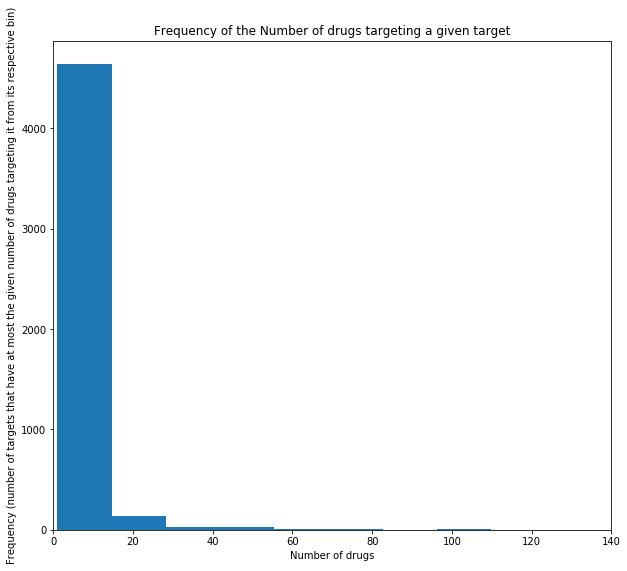

In [51]:
hist_plot_target = df20['target_freq'].hist(bins=10,grid=False, figsize=(10,9))
hist_plot_target.set_xlabel('Number of drugs')
hist_plot_target.set_ylabel('Frequency (number of targets that have at most the given number of drugs targeting it from its respective bin)')
hist_plot_target.set_title('Frequency of the Number of drugs targeting a given target')
hist_plot_target.set_xlim(0,140)
#creates a histogram that contains the target frequncies that have x (x-axis) number of drugs that target a given target
#y-axis is the number of targets that fit within the criteria. Most targets can be seen to have at most 10 drugs targeting it

In [52]:
df16 = pd.merge(df8, df10, on='drug_name', how='inner')
df16.head(15) #df16 is a dataframe that includes all drugs integrated with df10 and displays all target ids, names, genes, and the number of targets based on a gene 
#Only includes drugs that have a maximum of two targets
df16.head()

,ID,1,2,3,4,5,6,PT,8,9,drug_name,target_id,target_name,target_gene,number_of_targets
0,CID100000596,CID000006252,C0020456,NaN,12.1%,0.121212,0.121212,PT,C0020456,Hyperglycaemia,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113, B...","[DNA polymerase beta, DNA polymerase beta, DNA...","[POLB, POLB, POLB, POLB, POLB, POLB, POLB, POL...",2
1,CID100000596,CID000006252,C0020456,NaN,5.84%,0.058366,0.058366,PT,C0020456,Hyperglycaemia,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113, B...","[DNA polymerase beta, DNA polymerase beta, DNA...","[POLB, POLB, POLB, POLB, POLB, POLB, POLB, POL...",2
2,CID100000596,CID000006252,C0020456,NaN,7.14%,0.071429,0.071429,PT,C0020456,Hyperglycaemia,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113, B...","[DNA polymerase beta, DNA polymerase beta, DNA...","[POLB, POLB, POLB, POLB, POLB, POLB, POLB, POL...",2
3,CID100000596,CID000006252,C0020538,NaN,15.2%,0.151515,0.151515,PT,C0020538,Hypertension,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113, B...","[DNA polymerase beta, DNA polymerase beta, DNA...","[POLB, POLB, POLB, POLB, POLB, POLB, POLB, POL...",2
4,CID100000596,CID000006252,C0020538,NaN,3.57%,0.035714,0.035714,PT,C0020538,Hypertension,cytarabine,"[BE0000113, BE0000113, BE0000113, BE0000113, B...","[DNA polymerase beta, DNA polymerase beta, DNA...","[POLB, POLB, POLB, POLB, POLB, POLB, POLB, POL...",2


In [53]:
res = df16.set_index(['ID',1,2,'PT', 4,5,9, 'drug_name','number_of_targets', ])['target_id'].apply(pd.Series).stack() #this stacked all of samples on top of each other with respect to target_id
res2 = res.reset_index()
res2.columns = ['ID',1,2,'PT', 4,5,9, 'drug_name','number_of_targets','sample_num','target_id'] #rests name of columns 
res3 = res2
df27 = res3.drop_duplicates(subset = ['ID', 1, 2, 5,9,'drug_name', 'target_id']) #drops all duplicate values with respect to the given columns 
df27.head(15)
#the next step would be to integrate df21 to get all targets that have at least two drugs targeting it

,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num,target_id
0,CID100000596,CID000006252,C0020456,PT,12.1%,0.121212,Hyperglycaemia,cytarabine,2,0,BE0000113
9,CID100000596,CID000006252,C0020456,PT,5.84%,0.058366,Hyperglycaemia,cytarabine,2,0,BE0000113
18,CID100000596,CID000006252,C0020456,PT,7.14%,0.071429,Hyperglycaemia,cytarabine,2,0,BE0000113
27,CID100000596,CID000006252,C0020538,PT,15.2%,0.151515,Hypertension,cytarabine,2,0,BE0000113
36,CID100000596,CID000006252,C0020538,PT,3.57%,0.035714,Hypertension,cytarabine,2,0,BE0000113
45,CID100000596,CID000006252,C0020538,PT,5.84%,0.058366,Hypertension,cytarabine,2,0,BE0000113
54,CID100000596,CID000006252,C0020649,PT,18.2%,0.181818,Hypotension,cytarabine,2,0,BE0000113
63,CID100000596,CID000006252,C0020649,PT,7.14%,0.071429,Hypotension,cytarabine,2,0,BE0000113
72,CID100000596,CID000006252,C0020649,PT,8.17%,0.081712,Hypotension,cytarabine,2,0,BE0000113
81,CID100001978,CID000001978,C0020649,PT,1%,0.010000,Hypotension,acebutolol,2,0,BE0000172


In [54]:
df27.loc[df27['target_id'].isin(["BE0000123"])] # testing to see whether there is any information about BE0000123, which targets ESR1, but none is present (must look higher up)

,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num,target_id


In [55]:
df28 = pd.merge(df21, df27, on='target_id', how='outer') #merges df21(which contains all targets with more than two drugs targetin it) and df27 (the current master dataframe)
df28.head()
#there are several Nan values for targets that had less than two drugs targeting it or targets that werent in the previous master dataframe (like BE0001072). 
#These must be removed (and it is done in df29)

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num
0,BE0001072,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,0%,0.000,Hypotension,argatroban,1.0,0.0
2,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.3%,0.103,Hypotension,argatroban,1.0,0.0
3,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.7%,0.107,Hypotension,argatroban,1.0,0.0
4,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,2.6%,0.026,Hypotension,argatroban,1.0,0.0


In [56]:
df29 = df28.dropna(axis=0)
#df29 is a dataframe that contains all drugs that have at most two targets and all targets that have at least two drugs targeting it
df29.head()
#There are a total of 492 data samples (no repeats) that fit within all of our criteria (drug_freq, taget_freq, PT, trait, etc.)

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,0%,0.000,Hypotension,argatroban,1.0,0.0
2,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.3%,0.103,Hypotension,argatroban,1.0,0.0
3,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.7%,0.107,Hypotension,argatroban,1.0,0.0
4,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,2.6%,0.026,Hypotension,argatroban,1.0,0.0
5,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,3%,0.030,Hypotension,argatroban,1.0,0.0


In [57]:
df29.loc[df29['target_id'].isin(["BE0000123"])] #searching for target associated with ESR1 (scroll up)

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num


In [58]:
df29.loc[df29['drug_name'].isin(["repaglinide"])] #searching for information about drug tibolone, which passed all criteria in the other data sample

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num
129,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,16%,0.16,Hypoglycaemia,repaglinide,2.0,1.0
130,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,20%,0.20,Hypoglycaemia,repaglinide,2.0,1.0
131,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,31%,0.31,Hypoglycaemia,repaglinide,2.0,1.0
132,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,7%,0.07,Hypoglycaemia,repaglinide,2.0,1.0
899,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,16%,0.16,Hypoglycaemia,repaglinide,2.0,0.0
900,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,20%,0.20,Hypoglycaemia,repaglinide,2.0,0.0
901,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,31%,0.31,Hypoglycaemia,repaglinide,2.0,0.0
902,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,7%,0.07,Hypoglycaemia,repaglinide,2.0,0.0


In [59]:
df29['drug_name'].unique() #shows all unique drugs that fit within our criteria

array(['argatroban', 'buspirone', 'cyclobenzaprine', 'donepezil',
       'azelastine', 'cetirizine', 'dicyclomine', 'ketorolac',
       'meloxicam', 'nabumetone', 'rofecoxib', 'bicalutamide',
       'nilutamide', 'guanfacine', 'moxonidine', 'dexmedetomidine',
       'nateglinide', 'repaglinide', 'telmisartan', 'acebutolol',
       'atenolol', 'betaxolol', 'bisoprolol', 'metoprolol', 'nadolol',
       'indacaterol', 'reboxetine', 'fluvoxamine', 'lorcaserin',
       'cyclophosphamide', 'ifosfamide', 'ritonavir', 'zaleplon',
       'esmolol', 'modafinil', 'alfentanil', 'fondaparinux', 'apixaban',
       'neostigmine', 'rivastigmine', 'sitagliptin', 'vildagliptin',
       'desonide', 'etravirine', 'alprazolam', 'clobazam', 'lorazepam',
       'alosetron', 'dolasetron', 'granisetron', 'tropisetron',
       'frovatriptan', 'almotriptan', 'etoposide', 'mitoxantrone',
       'teniposide', 'riluzole', 'oxcarbazepine', 'fosphenytoin',
       'trimethoprim', 'fospropofol', 'ivermectin', 'cisatrac

In [60]:
len(df29['drug_name'].unique()) #There are 204 unique drugs that have at least two targets and fit 
#the criteria that a target must have at least two drugs targeting it

162

In [61]:
df34 = df21.drop('target_freq', axis=1)
df34.head()
#gets a list of all target_ids 


,target_id
0,BE0001072
1,BE0000048
2,BE0000123
3,BE0000756
4,BE0000451


In [62]:
df35 = pd.merge(df34, indexed_df, on='target_id', how='outer') 
df36 = df35.drop('drug_id', axis=1)
df37 = df36.drop_duplicates()
df37.head()
#OVERALL: merges df34 with indexed_df and drops drug_id to create a dataframe with only target_id, target_name, and target_gene

,target_id,target_name,target_gene
0,BE0001072,Cyclin-dependent kinase 2,CDK2
137,BE0000048,Prothrombin,F2
249,BE0000123,Estrogen receptor alpha,ESR1
360,BE0000756,D(2) dopamine receptor,DRD2
468,BE0000451,5-hydroxytryptamine receptor 2A,HTR2A


In [63]:
df38 = pd.merge(df29, df37, on='target_id', how='outer')
df39 = df38.dropna(axis=0) 
df39.head(10)
#df39 shows the same data as df38 but also includes the names of drug targets. 
#Includes all samples (drugs and targets) where drugs have at least two targets
#and targets have at least two drugs targeting it

#genes --> DRD2, HTR2A, ...

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,0%,0.000,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.3%,0.103,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
2,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.7%,0.107,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
3,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,2.6%,0.026,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
4,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,3%,0.030,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
5,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,5%,0.050,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
6,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,7%,0.070,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
7,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,7.2%,0.072,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
8,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,8%,0.080,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
9,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,9%,0.090,Hypotension,argatroban,1.0,0.0,Prothrombin,F2


In [64]:
df38.head()

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,0%,0.000,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.3%,0.103,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
2,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.7%,0.107,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
3,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,2.6%,0.026,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
4,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,3%,0.030,Hypotension,argatroban,1.0,0.0,Prothrombin,F2


In [65]:
df39['target_id'].unique() #finds all unique target_ids in df39

array(['BE0000048', 'BE0000756', 'BE0000451', 'BE0000442', 'BE0000092',
       'BE0000291', 'BE0000560', 'BE0000262', 'BE0000017', 'BE0000132',
       'BE0000289', 'BE0000215', 'BE0000694', 'BE0000486', 'BE0000749',
       'BE0000533', 'BE0000956', 'BE0000795', 'BE0000172', 'BE0000575',
       'BE0000770', 'BE0000216', 'BE0000426', 'BE0000854', 'BE0000794',
       'BE0000572', 'BE0000647', 'BE0000090', 'BE0002050', 'BE0004797',
       'BE0001594', 'BE0000311', 'BE0000797', 'BE0000742', 'BE0000197',
       'BE0000659', 'BE0002180', 'BE0000330', 'BE0002345', 'BE0000738',
       'BE0001012', 'BE0000324', 'BE0000779', 'BE0000250', 'BE0002346',
       'BE0000576', 'BE0004643', 'BE0000221', 'BE0000270', 'BE0003721',
       'BE0000668', 'BE0000014', 'BE0000924', 'BE0000453', 'BE0001023',
       'BE0000163', 'BE0004136', 'BE0003624', 'BE0000177', 'BE0000203',
       'BE0000182', 'BE0000574', 'BE0000695', 'BE0001246', 'BE0000143',
       'BE0000062', 'BE0000971', 'BE0002393', 'BE0000280', 'BE00

In [66]:
len(df39['target_id'].unique()) #91 unique targets in the sample

135

In [67]:
import numpy as np 
np.set_printoptions(threshold=np.inf)
df40 = df39
df41 = df40.drop_duplicates(subset = ['target_name','target_freq', 1, 2, 5,9,'drug_name', 'target_id', 'target_gene', 'number_of_targets'])
df41.head()

#df41 drops all duplicates of target genes so that a unique list of target genes can be made

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,0%,0.000,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.3%,0.103,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
2,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,10.7%,0.107,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
3,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,2.6%,0.026,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
4,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,3%,0.030,Hypotension,argatroban,1.0,0.0,Prothrombin,F2


In [68]:
df41.loc[df41['drug_name'].isin(["repaglinide"])]

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num,target_name,target_gene
122,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,16%,0.16,Hypoglycaemia,repaglinide,2.0,1.0,Peroxisome proliferator-activated receptor gamma,PPARG
123,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,20%,0.20,Hypoglycaemia,repaglinide,2.0,1.0,Peroxisome proliferator-activated receptor gamma,PPARG
124,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,31%,0.31,Hypoglycaemia,repaglinide,2.0,1.0,Peroxisome proliferator-activated receptor gamma,PPARG
125,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,7%,0.07,Hypoglycaemia,repaglinide,2.0,1.0,Peroxisome proliferator-activated receptor gamma,PPARG
668,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,16%,0.16,Hypoglycaemia,repaglinide,2.0,0.0,ATP-binding cassette sub-family C member 8,ABCC8
669,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,20%,0.20,Hypoglycaemia,repaglinide,2.0,0.0,ATP-binding cassette sub-family C member 8,ABCC8
670,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,31%,0.31,Hypoglycaemia,repaglinide,2.0,0.0,ATP-binding cassette sub-family C member 8,ABCC8
671,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,7%,0.07,Hypoglycaemia,repaglinide,2.0,0.0,ATP-binding cassette sub-family C member 8,ABCC8


In [69]:
df42 = df41.drop_duplicates('target_gene')
df42.head()

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,0%,0.000,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
10,BE0000756,108.0,CID100002477,CID000002477,C0020538,PT,infrequent,0.001,Hypertension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
12,BE0000451,105.0,CID100002895,CID000002895,C0020538,PT,postmarketing,0.000,Hypertension,cyclobenzaprine,1.0,0.0,5-hydroxytryptamine receptor 2A,HTR2A
19,BE0000442,104.0,CID100002267,CID000002267,C0020538,PT,postmarketing,0.000,Hypertension,azelastine,1.0,0.0,Histamine H1 receptor,HRH1
22,BE0000092,97.0,CID100003042,CID000003042,C0020538,PT,postmarketing,0.000,Hypertension,dicyclomine,2.0,0.0,Muscarinic acetylcholine receptor M1,CHRM1


In [70]:
df42['target_gene'].unique

<bound method Series.unique of 0           F2
10        DRD2
12       HTR2A
19        HRH1
22       CHRM1
23       HTR1A
25       CHRM2
26       PTGS2
52       PTGS1
73          AR
78      ADRA2A
119      PPARG
132      ADRB2
152     SLC6A2
157     SLC6A4
165      HTR2C
169      NR1I2
176     GABRA1
181      ADRB1
201     ADRA1B
202      OPRM1
204        F10
212       ACHE
227       DPP4
231      NR3C1
232     ADRA2B
235     SLC6A3
236      KCNH2
244    gag-pol
257      HTR3A
        ...   
833    CYP51A1
840     GABBR2
856      ATP4A
860    GUCY1A2
862     NS3/4A
865    CACNA1A
877       rplJ
878       SQLE
880       OXTR
881      POLA1
886       POLB
896     MAP2K2
906      P4HA1
907     SLC5A2
908     BDKRB1
918        JUN
921    CYP17A1
930    CYP11B1
931      PSMB5
942      PSMB1
953       AOC3
954      NISCH
955      ABCC9
964     PRKAB1
966     SLC6A1
970       TLR8
971      HDAC1
973     TOP1MT
985      GHRHR
989      SFRP4
Name: target_gene, Length: 130, dtype: object>

In [71]:
df43 = df42['target_gene'].unique
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(df43)
#prints out entire list of unique genes that need to be analyzed using the frequency data (total of 89 genes)

<bound method Series.unique of 0            F2
10         DRD2
12        HTR2A
19         HRH1
22        CHRM1
23        HTR1A
25        CHRM2
26        PTGS2
52        PTGS1
73           AR
78       ADRA2A
119       PPARG
132       ADRB2
152      SLC6A2
157      SLC6A4
165       HTR2C
169       NR1I2
176      GABRA1
181       ADRB1
201      ADRA1B
202       OPRM1
204         F10
212        ACHE
227        DPP4
231       NR3C1
232      ADRA2B
235      SLC6A3
236       KCNH2
244     gag-pol
257       HTR3A
291       HTR1B
294       TOP2A
298       SCN5A
312       HTR1D
315        BCHE
323        DHFR
324      GABRB3
328      CHRNA2
329       ADRB3
335        TYMS
336         VDR
349         PNP
353      GABRB2
356        pbpA
358        pbp3
359         ACE
385         REN
386         AHR
387       NR3C2
388        ABL1
395     ADORA2A
400         KIT
407       TRPV1
410       VEGFA
414         pol
427        penA
428      SCN10A
456       GNRHR
459       PDE5A
463       HMGCR
465      

In [74]:
#df44 is a dataframe used to find which gene has two targets that fit within our criteria since we have 91 targets and 89 genes that fit the total criteria
df44 = df41.drop_duplicates(subset = ['target_id', 'target_gene']) 
df44.head()
df44[df44.groupby('target_gene').target_gene.transform(len) > 1]
#we find that the genes GABRA1 and pol have two targets each

,target_id,target_freq,ID,1,2,PT,4,5,9,drug_name,number_of_targets,sample_num,target_name,target_gene
176,BE0000795,63.0,CID100005719,CID000005719,C0020456,PT,rare,0.000,Hyperglycaemia,zaleplon,2.0,0.0,Gamma-aminobutyric acid receptor subunit alpha-1,GABRA1
244,BE0002050,47.0,CID100193962,CID000193962,C0020538,PT,2.8%,0.028,Hypertension,etravirine,2.0,0.0,Gag-Pol polyprotein,gag-pol
245,BE0004797,44.0,CID100002118,CID000002118,C0020649,PT,4.7%,0.047,Hypotension,alprazolam,1.0,0.0,GABA-A receptor (anion channel),GABRA1
256,BE0001594,44.0,CID100193962,CID000193962,C0020538,PT,2.8%,0.028,Hypertension,etravirine,2.0,1.0,Gag-Pol polyprotein,gag-pol
414,BE0004136,17.0,CID100003043,CID000003043,C0020456,PT,postmarketing,0.000,Hyperglycaemia,didanosine,2.0,0.0,Reverse transcriptase/RNaseH,pol
594,BE0000233,13.0,CID100071616,CID000071616,C0020538,PT,0%,0.000,Hypertension,voriconazole,1.0,0.0,Lanosterol 14-alpha demethylase,ERG11
693,BE0004854,10.0,CID100002177,CID000065016,C0020456,PT,41%,0.410,Hyperglycaemia,amprenavir,1.0,0.0,Human immunodeficiency virus type 1 protease,pol
895,BE0004855,4.0,CID146216142,CID046216142,C0020456,PT,12%,0.120,Hyperglycaemia,dolutegravir,1.0,0.0,Integrase,pol
957,BE0000690,3.0,CID100003793,CID000055283,C0020538,PT,0%,0.000,Hypertension,itraconazole,2.0,1.0,Lanosterol 14-alpha demethylase,ERG11
